# 1. 한눈에 보는 머신러닝

## 1. 지도 학습: supervised learning

- 알고리즘에 주입하는 훈련 데이터에 레이블이 포함
- 분류(classification), 회귀(regression)
- 지도 학습 알고리즘
    1. k최근접이웃(k-nearest neighbors)
    2. 선형 회귀(linear regression)
    3. 로지스틱 회귀(logistic regression)
    4. 서포트 벡터 머신(support vector machine(svm))
    5. 결정트리(decision tree)
    6. 랜덤 포레스트(random forest)
    7. 신경망(neural networks)

## 2. 비지도 학습: unsupervised learning

- 훈련 데이터에 레이블이 없음
- 비지도 학습 알고리즘
    1. 군집(clustering)
        - k-평균(k-means)
        - DBSCAN
        - 계층 군집 분석(HCA: hierarchical cluster analysis)
        - 이상치 탐지(outlier detection), 특이치 탐지(novelty dection)
        - one-class SVM
        - isolation forest
    2. 시각화(visualization)와 차원 축소(dimensionality reduction)
        - 주성분 분석(PCA: principal component analysis)
        - kernel PCA
        - 지역적 선형 임베딩(LLE: locally-linear embedding)
        - t-SNE(t-distributed stochastic neighbor embedding)
    3. 연관 규칙 학습(association rule learning)
        - Apriori
        - Eclat

## 3. 준지도학습: semisupervised learning

- 일부만 레이블이 있는 데이터

## 4. 강화 학습: reinforcement learning

- 학습하는 시스템을 에이전트라고 부르며 environment을 관찰해서 action을 실행하고 그 결과로 reward 또는 penalty를 받음
- 시간이 지나면서 가장 큰 보상을 얻기 위해 policy라고 부르는 최상의 전략을 스스로 학습
- policy는 주어진 상화엥서 에이전트가 어떤 행동을 선택해야 할 지 정의함

#### 사이킷런을 이용한 선형 모델의 훈련과 실행

- 돈이 사람을 행복하게 만드는지 확인
- OECD 웹사이트(https://homl.info/4)에서 더 나은 삶의 지표(better life index)데이터와 IMF 웹사이트(https://homl.info/5)에서 1인당 GDP 통계 다운

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

In [44]:
# 데이터 불러오기

oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands = ',')     # 데이터 파일 불러올 때 thousands = ',' 사용하면 천단위 콤마 제거
oecd_bli.head(1)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value


In [45]:
# na_values 옵션은 결측치를 지정해주는 옵션. 여기서는 n/a로 되어 있으면 결측치로 인식하도록 함

gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands = ',', delimiter = '\t', encoding = 'latin1', na_values = 'n/a')
gdp_per_capita.head(1)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0


In [46]:
# oecd_bli 데이터와 gdp_per_capita 데이터 병합

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index = 'Country',
                              columns = 'Indicator',
                              values = 'Value')
    gdp_per_capita.rename(columns = {'2015': 'GDP per capita'}, inplace = True)
    gdp_per_capita.set_index('Country', inplace = True)
    full_country_stats = pd.merge(left = oecd_bli, right = gdp_per_capita,
                                  left_index = True, right_index = True)
    full_country_stats.sort_values(by = 'GDP per capita', inplace = True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [47]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


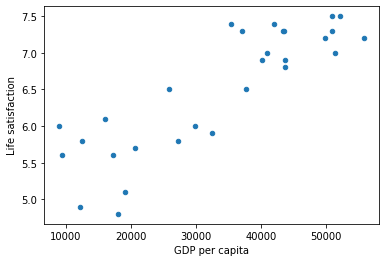

In [53]:
# 데이터 시각화

country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.show()

In [54]:
X = np.c_[country_stats['GDP per capita']]     # np.c_: 배열을 가로방향으로 합치기
y = np.c_[country_stats['Life satisfaction']]

In [55]:
# 선형 모델

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# 키프로스라는 나라에 대한 예측 만들기

X_new = [[22587]]    # 키프로스 1인당 GDP
print(model.predict(X_new))

[[5.96242338]]


In [56]:
# k-최근접 이웃(k-nearest neigobors) 모델

import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X, y)

X_new = [[22587]]
print(model.predict(X_new))

[[5.76666667]]


### 연습문제

1. 머신러닝의 정의

    - 머신러닝은 데이터로부터 학습할 수 있는 시스템을 만드는 것.
    - 학습이란 어떤 작업에서 주어진 성능 지표가 더 나아지는 것.

2. 머신러닝이 도움을 줄 수 있는 문제 유형 4가지

    - 명확한 해결책이 없는 복잡한 문제, 수작업으로 만든 긴 규칙 리스트를 대체하는 경우, 변화하는 환경에 적응하는 시스템을 만드는 경우, 사람에게 통찰을 제공해야 하는 경우

3. 레이블된 훈련 세트란?

    - 각 샘플에 대해 원하는 정답(레이블)을 담고 있는 훈련 세트

4. 가장 널리 사용되는 지도 학습 작업 2가지

    - 회귀, 분류

5. 보편적인 비지도 학습 작업 4가지

    - 군집, 시각화, 차원 축소, 연관 규칙 학습
    
6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있나?

    - 강화 학습

7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하나?

    - 만약 그룹을 어떻게 정의할지 모른다면 비슷한 고객끼리 군집으로 나누기 위해 군집 알고리즘(비지도 학습) 사용
    - 어떤 그룹이 있어야 할지 안다면 분류 알고리즘(지도 학습)에 각 그룹에 대한 샘플을 주입함. 그러면 알고리즘이 전체 고객을 이런 그룹으로 분류하게 됨.

8. 스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 문제로 볼 수 있나?

    - 지도 학습
    - 알고리즘에 많은 이메일과 이에 상응하는 레이블(스팸 혹은 스팸 아님)이 제공됨

9. 온라인 학습 시스템이란?

    - 배치 학습 시스템과 달리 점진적으로 학습할 수 있음
    - 변화하는 데이터와 자율 시스템에 빠르게 적응하고 매우 많은 양의 데이터를 훈련시킬 수 있음

10. 외부 메모리 학습이란?

    - 컴퓨터의 주메모리에 들어갈 수 없는 대용량의 데이터를 다룰 수 있음
    - 외부 메모리 학습 알고리즘은 데이터를 미니배치로 나누고 온라인 학습 기법을 사용해 학습

11. 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은?

    - 사례 기반 학습 시스템은 훈련 데이터를 기억하는 학습
    - 새로운 샘플이 주어지면 유사도 측정을 사용해 학습된 샘플 중에서 가장 비슷한 것을 찾아 예측으로 사용

12. 모델 파라미터와 학습 알고리즘의 하이퍼파라미터 사이에는 어떤 차이가 있나?

    - 모델은 하나 이상의 파라미터를 사용해 새로운 샘플이 주어지면 무엇을 예측하지 결정함
    - 학습 알고리즘은 모델이 새로운 샘플에 잘 일반화되도록 이런 파라미터들의 최적값을 찾음
    - 하이퍼파라미터는 모델이 아니라 이런 학습 알고리즘 자체의 파라미터.

13. 모델 기반 알고리즘이 찾는 것은 무엇인가? 성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은 무엇인가? 예측은 어떻게 만드나?

    - 모델 기반 학습 알고리즘은 새로운 샘플에 잘 일반화되기 위한 모델 파라미터의 최적값을 찾음
    - 일반적으로 훈련 데이터에서 시스템의 예측이 얼마나 나쁜지 측정하고 모델에 규제가 있다면 모델 복잡도에 대한 페널티를 더한 비용 함수를 최소화함으로써 시스템을 훈련시킴
    - 예측을 만들려면 학습 알고리즘이 찾은 파라미터를 사용하는 모델의 예측 함수에 새로운 샘플의 특성을 주입

14. 머신러닝의 주요 도전 과제는?

    - 부족한 데이터, 낮은 데이터 품질, 대표성 없는 데이터, 무의미한 특성, 훈련 데이터에 과소적합된 과도하게 간단한 모델, 훈련 데이터에 과대적합된 과도하게 복잡한 모델 등

15. 모델이 훈련 데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있나? 가능한 해결책 3가지

    - 훈련 데이터에 과대적합됨
    - 해결책: 더 많은 데이터를 모으거나, 모델을 단순화하거나(간단한 알고리즘을 선택하거나, 특성이나 파라미터의 수를 줄이거나, 모델에 규제를 추가함), 훈련 데이터에 있는 잡음을 감소시킴

16. 테스트 세트가 무엇이고 왜 사용해야 하나?

    - 실전에 배치되기 전에 모델이 새로운 샘플에 대해 만들 일반화 오차를 추정하기 위해 사용

17. 검증 세트의 목적

    - 모델을 비교하는 데 사용됨
    - 이를 사용해 가장 좋은 모델을 고르고 하이퍼파라미터를 튜닝함

18. 훈련-개발 세트가 무엇인가? 언제 필요하고 어떻게 사용해야 하나?

    - 훈련-개발 세트는 (모델을 실전에 투입했을 때 사용될 데이터와 가능한 최대로 가까워야 하는)검증, 테스트 세트에 사용되는 데이터와 훈련 세트 사이에 데이터 불일치 위험이 있을 때 사용
    - 훈련 세트의 일부에서 모델을 훈련하고 훈련-개발 세트와 검증 세트에서 평가함
    - 모델이 훈련 세트에서 잘 동작하지만 훈련-개발 세트에서 나쁜 성능을 낸다면 아마도 훈련 세트에 과대적합되었을 가능성이 높음
    - 훈련 세트와 훈련-개발 세트 양쪽에서 모두 잘 동작하지만 검증 세트에서 성능이 나쁘다면 훈련 데이터와 검증+테스트 데이터 사이에 데이터 불일치가 있을 가능성이 높음. 검증+테스트 데이터에 더 가깝게 되도록 훈련 데이터를 개선해야 함

19. 테스트 세트를 사용해 하이퍼파라미터를 튜닝하면 어떤 문제가 생기나?

    - 테스트 세트에 과대적합될 위험이 있고 일반화 오차를 낙관적으로 측정하게 됨.(모델을 출시하면 기대한 것보다 나쁜 성능을 냄)